In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import scipy as sp
import scipy.interpolate
import os
import sys
from mpl_styles import analytic
sys.path.insert(0, '/home/astrosun/jtlaune/athena/vis/python')
import athena_read
%matplotlib inline

# Extract bbox

In [4]:
def get_bbox(x1min,x1max,x2min,x2max,data_dict,filename):
    strobe = 1
    x1min_ind = np.where(data_dict["x1v"]>x1min)[0][0]
    x1max_ind = np.where(data_dict["x1v"]>x1max)[0][0]
    x2min_ind = np.where(data_dict["x2v"]>x2min)[0][0]
    x2max_ind = np.where(data_dict["x2v"]>x2max)[0][0]

    rho = data_dict["dens"][0,:,:]
    vr = data_dict["mom1"][0,::1,::1]/data_dict["dens"][0,::1,::1]
    vth = data_dict["mom2"][0,::1,::1]/data_dict["dens"][0,::1,::1]

    coordsr, coordsth = data_dict["x1v"], data_dict["x2v"]
    #coordsx = coordsr*np.cos(coordsth)
    #coordsy = coordsr*np.sin(coordsth)

    rc = coordsr[x1min_ind:x1max_ind:strobe]
    thc = coordsth[x2min_ind:x2max_ind:strobe]
    rhoc = rho[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe]
    vrc = vr[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe]
    vthc = vth[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe]

    np.savez(filename,rho=rhoc,vr=vrc,vth=vthc,r=rc,th=thc)

data = athena_read.athdf("/home/astrosun/rixinli/runs/JT/PrelimProductRun/JTrunI_Acc/ppd_cyl.out1.00039.athdf")
get_bbox(0.936,1.064,-0.064,0.064,data,"/home/astrosun/jtlaune/accreting_run.npz")
data = athena_read.athdf("/home/astrosun/rixinli/runs/JT/PrelimProductRun/JTrunI_noAcc/ppd_cyl.out1.00039.athdf")
get_bbox(0.936,1.064,-0.064,0.064,data,"/home/astrosun/jtlaune/non_accreting_run.npz")

# 2D

In [5]:
#os.chdir("/home/astrosun/jtlaune/athena/work-accretion/2percent-lowres-fiducial-1e-4/")
#os.chdir("/home/astrosun/jtlaune/athena/work-accretion/2percent-lowres-accrete-1e-4/restart1/")
#os.chdir("/home/astrosun/jtlaune/athena/work-accretion/")
os.chdir("/home/astrosun/rixinli/runs/JT/PrelimProductRun/JTrunII_Acc/")
#data0 = athena_read.athdf("ppd_cyl.out1.00000.athdf")
#rho0 = data0["dens"][0,:,:]
#vr0 = data0["mom1"][0,::1,::1]/data0["dens"][0,::1,::1]
#vth0 = data0["mom2"][0,::1,::1]/data0["dens"][0,::1,::1]

data = athena_read.athdf("ppd_cyl.out1.00059.athdf",quantities=["dens"])
rho = data["dens"][0,:,:]
#vr = data["mom1"][0,::1,::1]/data["dens"][0,::1,::1]
#vth = data["mom2"][0,::1,::1]/data["dens"][0,::1,::1]

coordsr, coordsth = np.meshgrid(data["x1v"], data["x2v"])
coordsx = coordsr*np.cos(coordsth)
coordsy = coordsr*np.sin(coordsth)

In [14]:
print(len(data["x1v"]))
print(len(data["mom1"]))

1

In [18]:
x1min,x1max = 0.936,1.064
x2min,x2max = -0.064,0.064
x1min_ind = np.where(data["x1v"]>x1min)[0][0]
x1max_ind = np.where(data["x1v"]>x1max)[0][0]
x2min_ind = np.where(data["x2v"]>x2min)[0][0]
x2max_ind = np.where(data["x2v"]>x2max)[0][0]
print(np.all(np.diff(data["x1v"][x1min_ind:x1max_ind])>0.))
print(np.all(np.diff(data["x2v"][x2min_ind:x2max_ind])>0.))
print(np.gradient(data["mom1"][0][0:10,0:10]/data["dens"][0][0:10,0:10],data["x1v"][0:10],axis=1))
print(data["mom1"][0][0:10,0:10]/data["dens"][0][0:10,0:10])

True
True
[[ 0.000000e+00  4.656613e-10 -4.656613e-10  4.656613e-10 -4.656613e-10
   0.000000e+00  4.656613e-10 -4.656613e-10  4.656613e-10  0.000000e+00]
 [ 0.000000e+00  4.656613e-10 -4.656613e-10  4.656613e-10 -4.656613e-10
   0.000000e+00  4.656613e-10 -4.656613e-10  4.656613e-10  0.000000e+00]
 [ 0.000000e+00  4.656613e-10 -4.656613e-10  4.656613e-10 -4.656613e-10
   0.000000e+00  4.656613e-10 -4.656613e-10  4.656613e-10  0.000000e+00]
 [ 0.000000e+00  4.656613e-10 -4.656613e-10  4.656613e-10 -4.656613e-10
   0.000000e+00  4.656613e-10 -4.656613e-10  4.656613e-10  0.000000e+00]
 [ 0.000000e+00  4.656613e-10 -4.656613e-10  4.656613e-10 -4.656613e-10
   0.000000e+00  4.656613e-10 -4.656613e-10  4.656613e-10  0.000000e+00]
 [ 0.000000e+00  4.656613e-10 -4.656613e-10  4.656613e-10 -4.656613e-10
   0.000000e+00  4.656613e-10 -4.656613e-10  4.656613e-10  0.000000e+00]
 [ 0.000000e+00  4.656613e-10 -4.656613e-10  4.656613e-10 -4.656613e-10
   0.000000e+00  4.656613e-10 -4.656613e-10  4.6

In [7]:
@mpl.rc_context(analytic)
def plot():
    strobe = 1
    x1min,x1max = 0.936,1.064
    x2min,x2max = -0.064,0.064
    #x1min,x1max = 0.99,1.01
    #x2min,x2max = -0.01,0.01
    #x1min,x1max = 0.9975,1.0025
    #x2min,x2max = -0.0025,0.0025
    x1min_ind = np.where(data["x1v"]>x1min)[0][0]
    x1max_ind = np.where(data["x1v"]>x1max)[0][0]
    x2min_ind = np.where(data["x2v"]>x2min)[0][0]
    x2max_ind = np.where(data["x2v"]>x2max)[0][0]
    #x1min_ind,x1max_ind,x2min_ind,x2max_ind = 0,-1,0,-1
    print(x1min_ind,x1max_ind,x2min_ind,x2max_ind)
    print(coordsr.shape)
    print(coordsr[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe])
    fig, ax = plt.subplots(figsize=(6,4))

    #rc = coordsr[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe]
    #thc = coordsth[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe]
    #rhoc = rho[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe]
    #vrc = vr[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe]
    #vthc = vth[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe]

    #pointsc = np.zeros((len(rc.flatten()),2))
    #rhoc = rhoc.flatten()
    #vrc = vrc.flatten()
    #vthc = vthc.flatten()
    #pointsc[:,0] = rc.flatten()
    #pointsc[:,1] = thc.flatten()

    #ri = np.linspace(rc.min(),rc.max(),1000)
    #thi = np.linspace(thc.min(),thc.max(),1000)
    #ri, thi = np.meshgrid(ri,thi)
    #ri = ri.flatten()
    #thi = thi.flatten()

    #interprho = sp.interpolate.griddata(pointsc,rhoc,(ri,thi))
    #interpvr = sp.interpolate.griddata(pointsc,vrc,(ri,thi))
    #interpvth = sp.interpolate.griddata(pointsc,vthc,(ri,thi))
    #print(ri.shape)
    #print(thi.shape)
    #print(interprho.shape)

    #cs1 = ax.pcolormesh(ri.reshape(1000,1000),
    #                    thi.reshape(1000,1000),
    #                    interprho.reshape(1000,1000))

    #ax.streamplot(ri.reshape(1000,1000),
    #              thi.reshape(1000,1000),
    #              interpvr.reshape(1000,1000),
    #              interpvth.reshape(1000,1000),linewidth=1,color="m")

    #cs1 = ax.pcolormesh(coordsr[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe],
    #                    coordsth[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe],
    #                    rho[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe])
    cs1 = ax.pcolormesh(coordsr,
                        coordsth,
                        rho,rasterized=True)
    #ax.set_xlim(x1min,x1max)
    #ax.set_ylim(x2min,x2max)
    #cs1 = ax.pcolormesh(coordsr[x1min_ind:x1max_ind,x2min_ind:x2max_ind],coordsth[x1min_ind:x1max_ind,x2min_ind:x2max_ind],rho[x1min_ind:x1max_ind,x2min_ind:x2max_ind])
    #cs1 = ax.quiver(data["x1v"], data["x2v"], 
    #                    vr, vth)#,shading="auto", norm=colors.LogNorm())
    #circ = plt.Circle((1, 0), 0.00032, color='c', fill=False)
    #ax.add_patch(circ)
    #circ = plt.Circle((1, 0), 0.00036, color='c', fill=False)
    #ax.add_patch(circ)
    #circ = plt.Circle((1, 0), 0.032, color='c', fill=False)
    #ax.add_patch(circ)
    #
    #
    #fig.colorbar(cs1)
    #ax.set_xlabel(r"$X$")
    #ax.set_ylabel(r"$Y$")
    #
    ##fig.colorbar(cs2)
    ##ax.set_title("integrator=vl2 & xorder=2")
    #fig.tight_layout()
    #
    #
plot()

7318 9066 48151 50153
(98304, 16384)
[[0.936023   0.93609625 0.93616945 ... 1.0638306  1.0639038  1.0639771 ]
 [0.936023   0.93609625 0.93616945 ... 1.0638306  1.0639038  1.0639771 ]
 [0.936023   0.93609625 0.93616945 ... 1.0638306  1.0639038  1.0639771 ]
 ...
 [0.936023   0.93609625 0.93616945 ... 1.0638306  1.0639038  1.0639771 ]
 [0.936023   0.93609625 0.93616945 ... 1.0638306  1.0639038  1.0639771 ]
 [0.936023   0.93609625 0.93616945 ... 1.0638306  1.0639038  1.0639771 ]]


MemoryError: Unable to allocate 48.0 GiB for an array with shape (1610612736, 4) and data type float64

<Figure size 600x400 with 1 Axes>

In [11]:
fig

NameError: name 'fig' is not defined

# History

In [2]:
nomTorque = 1e-4**2/0.05**2*.001
print(nomTorque)
bondiNorm = 2*np.pi*1e-4/0.05*0.001
print(bondiNorm)

3.9999999999999994e-09
1.2566370614359172e-05


In [3]:
os.chdir("/home/astrosun/rixinli/runs/JT/PrelimProductRun/JTrunII_noAcc/")
hst1 = np.loadtxt("ppd_cyl.hst")
os.chdir("/home/astrosun/rixinli/runs/JT/PrelimProductRun/JTrunII_Acc/")
hst2 = np.loadtxt("ppd_cyl.hst")

In [4]:
mpl.rcParams["figure.autolayout"] = True
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["text.usetex"] = False # exo4 doesn't have latex
plt.rcParams["mathtext.fontset"] = "dejavuserif"

## Torques from all forces

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

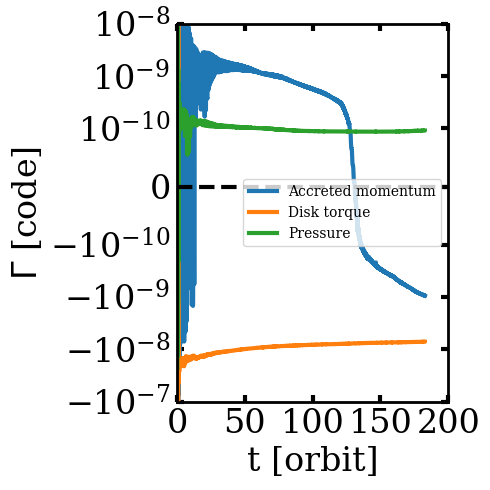

In [6]:
@mpl.rc_context(analytic)
def plot(hst1,hst2):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_xlim(0,hst1[-1,0]/np.pi/2)

    t=hst2[:,0]/np.pi/2
    tstart = 90
    #it = np.where(t>20)[0][0]
    it = 0
    t = t[it:]
    FP_x=hst2[:,-7]
    FP_y=hst2[:,-6]
    Fsgrav_x=hst2[:,-5]
    Fsgrav_y=hst2[:,-4]
    accrate=hst2[:,-3]
    momx_accrate =hst2[:,-2]
    momy_accrate =hst2[:,-1]
    ax.plot(t, momy_accrate, label="Accreted momentum")
    ax.plot(t, Fsgrav_y, label="Disk torque")
    ax.plot(t,FP_y, label="Pressure")
    #ax.axhline(y=bondiNorm,ls="--",c="k",label="Bondi 2-D")
    ax.axhline(y=0,ls="--",c="k")
    ax.set_ylim((-1e-7,1e-8))
    ax.set_yscale("symlog",linthresh=1e-10,)
    mpl.scale.SymmetricalLogScale
    ax.legend()
    ax.set_ylabel(r'$\Gamma$ [code]')
    ax.set_xlabel(r"t [orbit]")
    fig.tight_layout()
plot(hst1,hst2)

## Accretion rate

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

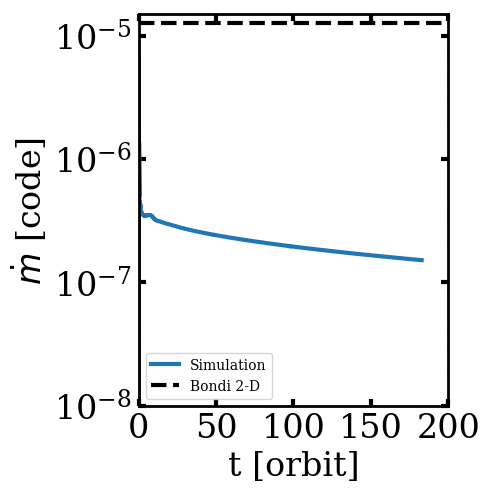

In [5]:
@mpl.rc_context(analytic)
def plot(hst1,hst2):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_xlim(0,hst1[-1,0]/np.pi/2)

    t=hst2[:,0]/np.pi/2
    tstart = 90
    #it = np.where(t>20)[0][0]
    it = 0
    t = t[it:]
    Fsgrav_x=hst2[:,-5]
    Fsgrav_y=hst2[:,-4]
    accrate=hst2[:,-3]
    momx_accrate =hst2[:,-2]
    momy_accrate =hst2[:,-1]
    ax.plot(t, accrate,label="Simulation")
    ax.axhline(y=bondiNorm,ls="--",c="k",label="Bondi 2-D")

    ax.legend()
    ax.set_ylabel(r'$\dot m$ [code]')
    ax.set_ylim((1e-8,1.5e-5))
    ax.set_yscale("log")
    ax.set_xlabel(r"t [orbit]")
    fig.tight_layout()
plot(hst1,hst2)

## Gravitational torque accreting vs fiducial

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

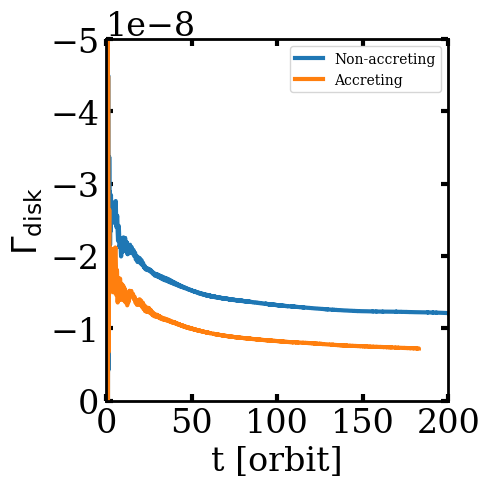

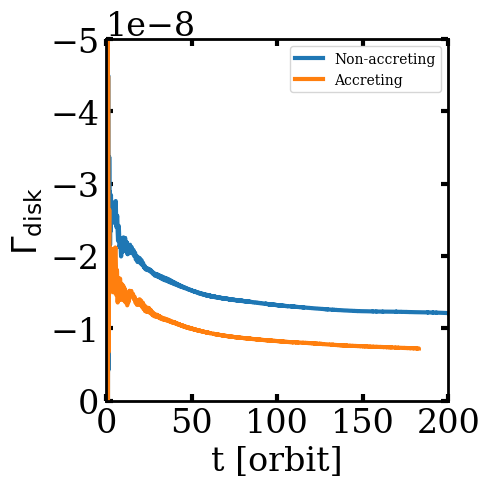

In [6]:
@mpl.rc_context(analytic)
def plot(hst1,hst2):
    fig, ax = plt.subplots(figsize=(5,5))

    t=hst1[:,0]/np.pi/2
    tstart = 90
    #it = np.where(t>20)[0][0]
    it = 0
    t = t[it:]
    Fsgrav_x=hst1[:,-5]
    Fsgrav_y=hst1[:,-4]
    accrate=hst1[:,-3]
    momx_accrate =hst1[:,-2]
    momy_accrate =hst1[:,-1]
    ax.plot(t, Fsgrav_y[it:],label="Non-accreting")
    ax.set_xlim((0,t[-1]))

    t=hst2[:,0]/np.pi/2
    tstart = 90
    #it = np.where(t>20)[0][0]
    it = 0
    t = t[it:]
    Fsgrav_x=hst2[:,-5]
    Fsgrav_y=hst2[:,-4]
    accrate=hst2[:,-3]
    momx_accrate =hst2[:,-2]
    momy_accrate =hst2[:,-1]
    ax.plot(t, Fsgrav_y[it:],label="Accreting")

    ax.legend()
    #ax.axhline(y=nomTorque,c="k",ls="--")
    ax.set_ylabel(r'$\Gamma_{\rm disk}$')
    ax.set_ylim((0,-5e-8))
    ax.set_xlabel(r"t [orbit]")
    fig.tight_layout()
plot(hst1,hst2)

# YT

In [1]:
import yt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds = yt.load("/home/astrosun/jtlaune/athena/test-changeSinkRstFile/ppd_cyl.out1.00190.athdf")

yt : [WARNING  ] 2023-05-02 10:22:34,088 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-02 10:22:34,089 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-02 10:22:34,090 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-02 10:22:34,091 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-02 10:22:34,144 Parameters: current_time              = 1130.9727
yt : [INFO     ] 2023-05-02 10:22:34,145 Parameters: domain_dimensions         = [ 256 1536    1]
yt : [INFO     ] 2023-05-02 10:22:34,146 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-02 10:22:34,147 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-02 10:22:34,147 Parameters: cosmological_simulation   = 0


In [4]:
s = yt.plot_2d(ds,("athena_pp","dens"),aspect=1,center=(1.,0),width=0.002).set_log(("athena_pp","dens"),False)

yt : [INFO     ] 2023-05-02 10:24:49,073 xlim = 0.999000 1.001000
yt : [INFO     ] 2023-05-02 10:24:49,074 ylim = -0.001000 0.001000
yt : [INFO     ] 2023-05-02 10:24:49,074 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2023-05-02 10:24:49,076 xlim = 0.999000 1.001000
yt : [INFO     ] 2023-05-02 10:24:49,076 ylim = -0.001000 0.001000
yt : [INFO     ] 2023-05-02 10:24:49,077 Making a fixed resolution buffer of (('athena_pp', 'dens')) 800 by 800


In [19]:
circ = plt.Circle((1, 0), 0.0007, color='c', fill=False)
ax = s.plots[("athena_pp","dens")].axes
ax.add_patch(circ)


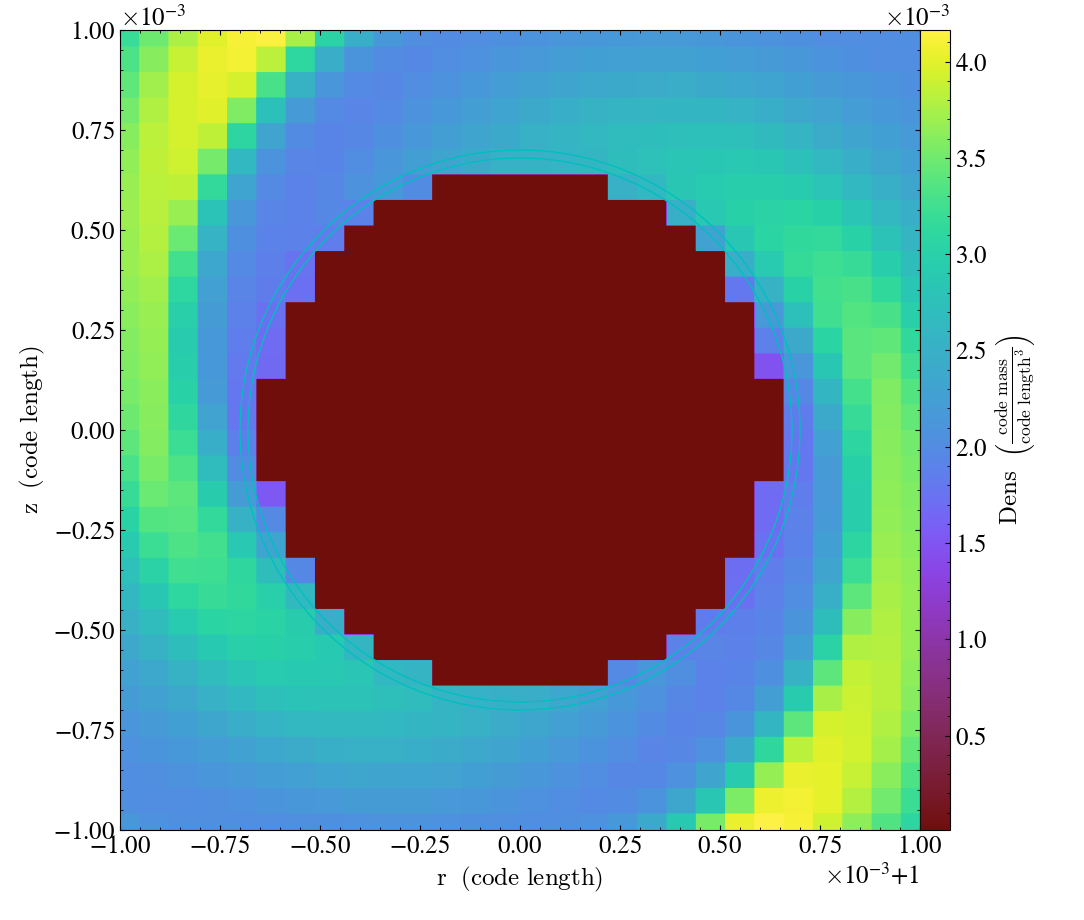

In [20]:
s

In [3]:
ds = yt.load("/home/astrosun/rixinli/runs/JT/PrelimProductRun/JTrunII_Acc/ppd_cyl.out1.00182.athdf")

yt : [WARNING  ] 2023-05-01 17:01:58,055 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-01 17:01:58,056 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-01 17:01:58,056 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-01 17:01:58,056 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-01 17:01:58,111 Parameters: current_time              = 1143.5396
yt : [INFO     ] 2023-05-01 17:01:58,111 Parameters: domain_dimensions         = [ 256 1536    1]
yt : [INFO     ] 2023-05-01 17:01:58,112 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-01 17:01:58,112 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-01 17:01:58,113 Parameters: cosmological_simulation   = 0


In [49]:
grid = ds.covering_grid(level=0,left_edge=ds.domain_left_edge,dims=ds.domain_dimensions)

In [60]:
ds.region

functools.partial(<class 'yt.data_objects.selection_objects.region.YTRegion'>, ds=<weakproxy at 0x7f7d3623aed0 to AthenaPPDataset at 0x7f7d351f7410>)

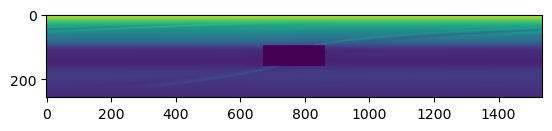

In [58]:
plt.imshow(grid["dens"].to_ndarray())

In [53]:
dir(ds)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_object_class',
 '_arr',
 '_assign_unit_system',
 '_create_unit_registry',
 '_dataset_type',
 '_determined_fields',
 '_field_info_class',
 '_field_map',
 '_find_extremum',
 '_force_periodicity',
 '_get_field_info',
 '_get_field_info_helper',
 '_guess_candidates',
 '_handle',
 '_hash',
 '_index_class',
 '_input_filename',
 '_instantiated',
 '_instantiated_index',
 '_ionization_label_format',
 '_is_valid',
 '_last_finfo',
 '_last_freq',
 '_magnetic_factor',
 '_max_level',
 '_min_level',
 '_mrep',
 '_ove

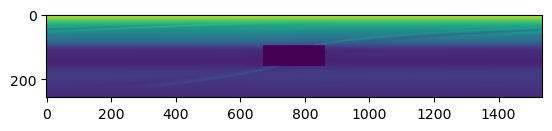

In [51]:
plt.imshow(grid["dens"])

In [26]:
cg = ds.covering_grid(level=2,left_edge=[0.4,-np.pi,0],dims=ds.domain_dimensions*2)

In [47]:
ds.index.grids[28].Level

0

In [48]:
for grid in ds.index.grids:
    print(grid.Level)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
2
2
2
3
3
3
3
2
2
3
3
4
4
4
4
4
4
4
4
3
3
4
4
4
4
4
4
4
5
5
5
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
2
2
3
3
4
4
5
5
6
6
6
6
5
4
4
4
4
4
3
3
4
4
4
4
4
4
4
4
2
2
3
3
3
3
2
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
2
3
3
3
3
2
2
4
4
4
4
4
4
4
4
3
3
4
4
4
4
4
5
6
6
6
6
5
5
4
4
3
3
2
2
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
6
6
6
5
5
5
4
4
4
4
4
4
4
3
3
4
4
4
4
4
4
4
4
3
3
2
2
3
3
3
3
2
2
2
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


TypeError: Invalid shape (512, 3072, 2) for image data

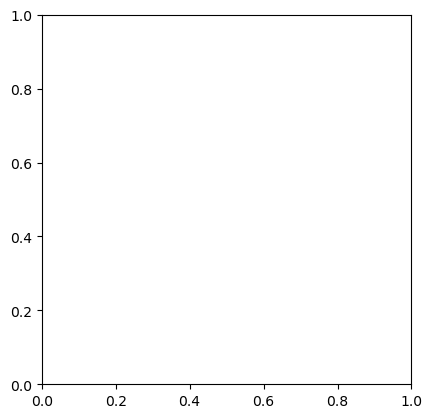

In [27]:
plt.imshow(cg["athena_pp","dens"])

In [13]:
frb[("athena_pp","dens")]

yt : [INFO     ] 2023-05-01 15:53:02,730 Making a fixed resolution buffer of (('athena_pp', 'dens')) 1000 by 1000


YTDataSelectorNotImplemented: Data selector 'arbitrary_grid' not implemented.

In [2]:
yt.toggle_interactivity()

Using matplotlib backend: <object object at 0x7f54903bf480>


In [5]:
print(ds.field_list)

[('athena_pp', 'dens'), ('athena_pp', 'mom1'), ('athena_pp', 'mom2'), ('athena_pp', 'mom3')]


In [11]:
g = ds.index.grids
for grid in g:
    if len(grid.Children) >0:
        print(grid)

athena's patch based mesh refinement means there are no overlap/children

In [17]:
g[42].icoords.shape

(1536, 3)

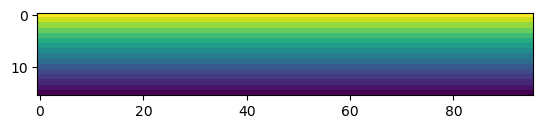

In [16]:
plt.imshow(g[42]["athena_pp","dens"])

In [51]:
ds.domain_dimensions

array([ 256, 1536,    1], dtype=int32)

In [55]:
all_0 = ds.smoothed_covering_grid(level=0,left_edge=[0.4,-np.pi,0],dims=ds.domain_dimensions)

In [56]:
dens_0 = all_0["athena_pp","dens"]
dens_0.shape

/home/astrosun/jtlaune/opt/miniconda3/envs/py311/lib/python3.11/site-packages/yt/data_objects/construction_data_containers.py:1500: RuntimeWarning: Something went wrong during field computation. This is likely due to missing ghost-zones support in class <class 'weakref.ProxyType'>
  warnings.warn(


(256, 1536, 1)

In [59]:
proj = ds.proj(("athena_pp","dens"),0)

In [68]:
proj = ds.proj(("athena_pp","dens"),"z")

In [69]:
frb = yt.FixedResolutionBuffer(proj,[0.4,1.6,-np.pi,np.pi],ds.domain_dimensions)

In [73]:
slc = yt.SlicePlot(ds,"z",("athena_pp","dens"))

yt : [INFO     ] 2023-05-01 15:46:26,343 xlim = 0.351033 1.600000
yt : [INFO     ] 2023-05-01 15:46:26,343 ylim = -0.767081 0.767081
yt : [INFO     ] 2023-05-01 15:46:26,343 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2023-05-01 15:46:26,344 xlim = 0.351033 1.600000
yt : [INFO     ] 2023-05-01 15:46:26,344 ylim = -0.767081 0.767081
yt : [INFO     ] 2023-05-01 15:46:26,345 Making a fixed resolution buffer of (('athena_pp', 'dens')) 800 by 800



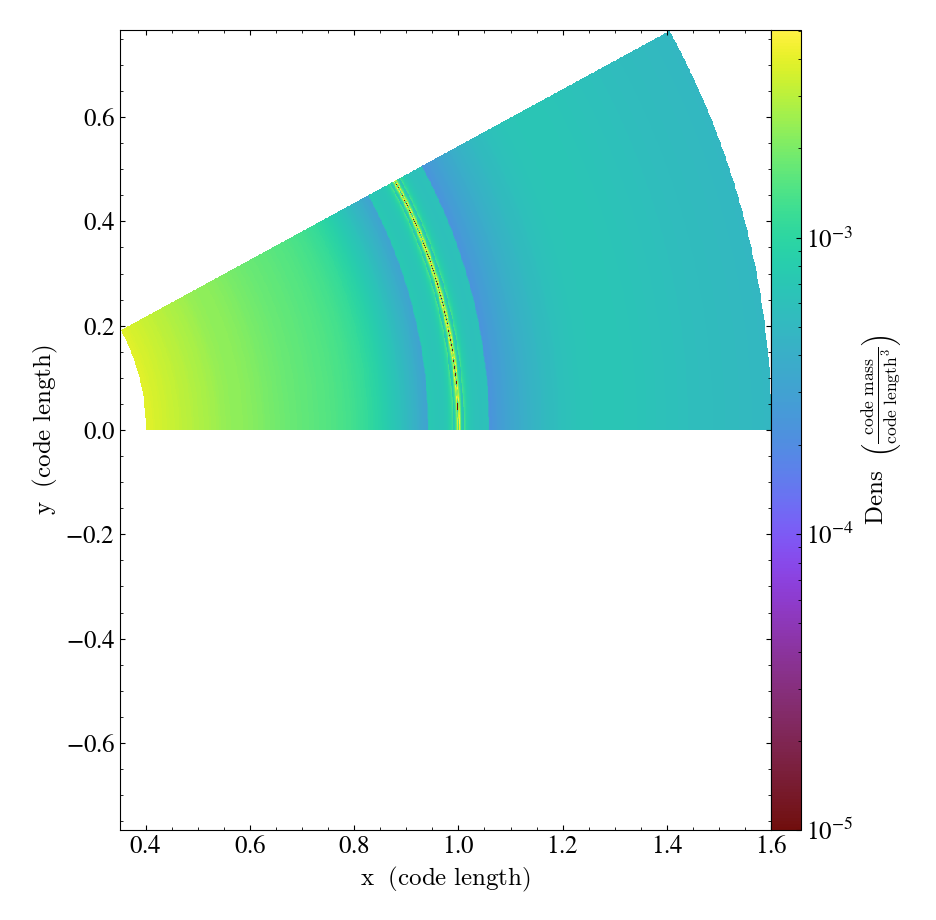

In [74]:
slc

In [70]:
frb

yt : [INFO     ] 2023-05-01 15:42:40,649 Making a fixed resolution buffer of (('athena_pp', 'dens')) 256 by 1536


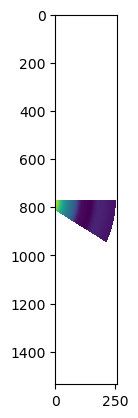

In [72]:
plt.imshow(frb[("athena_pp","dens")])

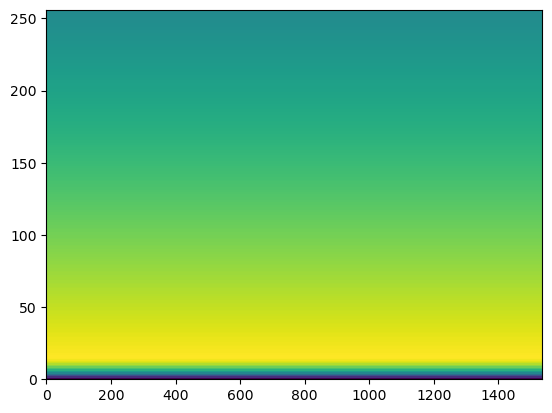

In [57]:
plt.pcolormesh(dens_0[:,:,0])

In [13]:
dir(g[42])

['ActiveDimensions',
 'Children',
 'LeftEdge',
 'Level',
 'NumberOfParticles',
 'OverlappingSiblings',
 'Parent',
 'RightEdge',
 '__abstractmethods__',
 '__add__',
 '__and__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_abc_impl',
 '_activate_cache',
 '_cache_mask',
 '_child_index_mask',
 '_child_indices',
 '_child_mask',
 '_chunk_info',
 '_chunked_read',
 '_compute_extrema',
 '_con_args',
 '_container_fields',
 '_count_particles',
 '_current_chunk',
 '_current_fluid_type',
 '_current_particle_type',
 '_d

yt : [INFO     ] 2023-05-01 17:03:04,226 xlim = 0.975000 1.025000
yt : [INFO     ] 2023-05-01 17:03:04,227 ylim = -0.025000 0.025000
yt : [INFO     ] 2023-05-01 17:03:04,227 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2023-05-01 17:03:04,228 xlim = 0.975000 1.025000
yt : [INFO     ] 2023-05-01 17:03:04,229 ylim = -0.025000 0.025000
yt : [INFO     ] 2023-05-01 17:03:04,229 Making a fixed resolution buffer of (('athena_pp', 'dens')) 800 by 800



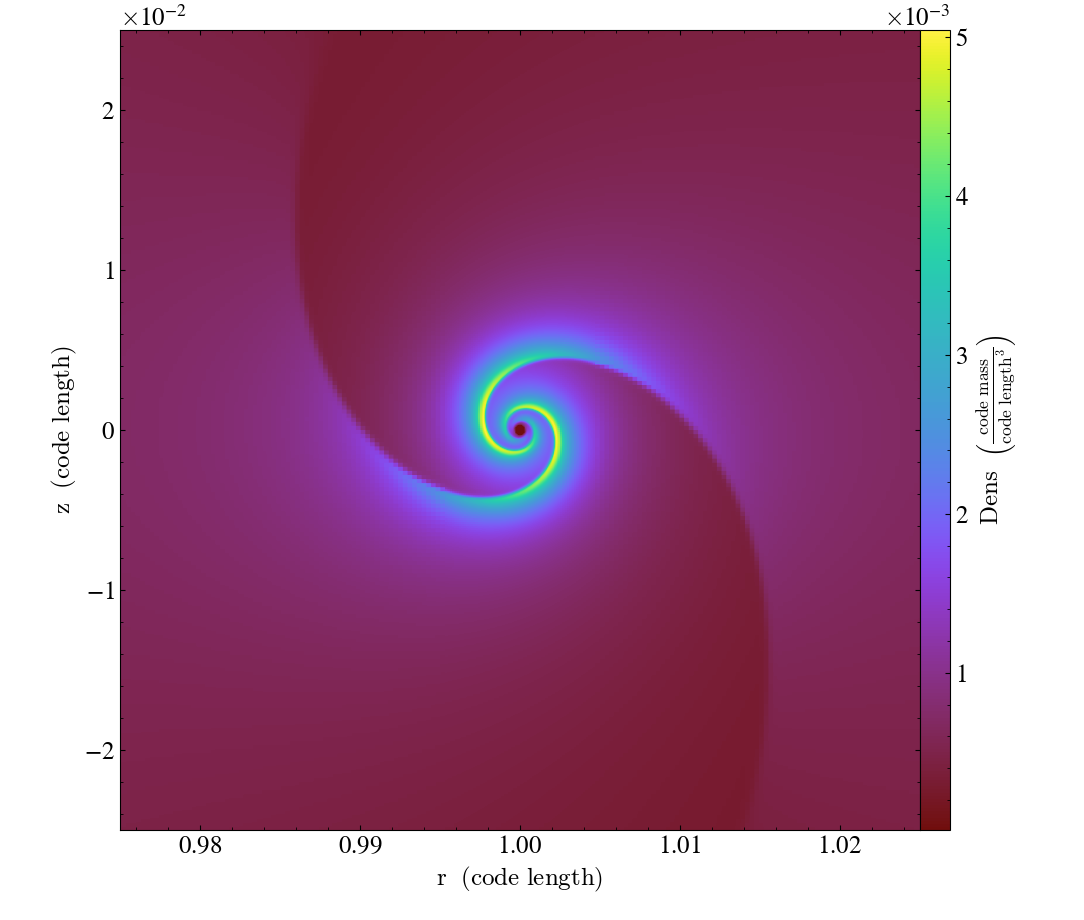

In [5]:
yt.plot_2d(ds,("athena_pp","dens"),aspect=1,center=(1.,0),width=0.05).set_log(("athena_pp","dens"),False)#,width=0.05


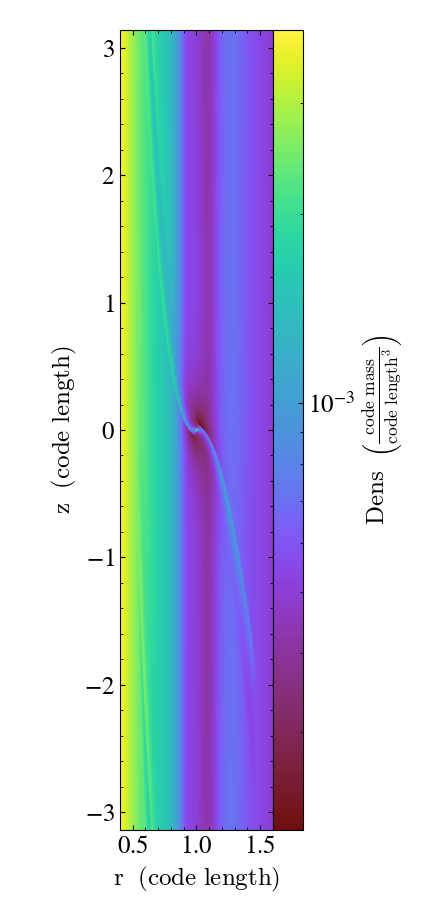

In [7]:
p

In [6]:
p.show()

AttributeError: 'FigureCanvasAgg' object has no attribute 'show'

yt : [INFO     ] 2023-04-30 00:42:55,992 xlim = 0.351033 1.600000
yt : [INFO     ] 2023-04-30 00:42:55,992 ylim = -0.767081 0.767081
yt : [INFO     ] 2023-04-30 00:42:55,993 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2023-04-30 00:42:55,993 xlim = 0.351033 1.600000
yt : [INFO     ] 2023-04-30 00:42:55,994 ylim = -0.767081 0.767081
yt : [INFO     ] 2023-04-30 00:42:55,994 Making a fixed resolution buffer of (('athena_pp', 'dens')) 800 by 800



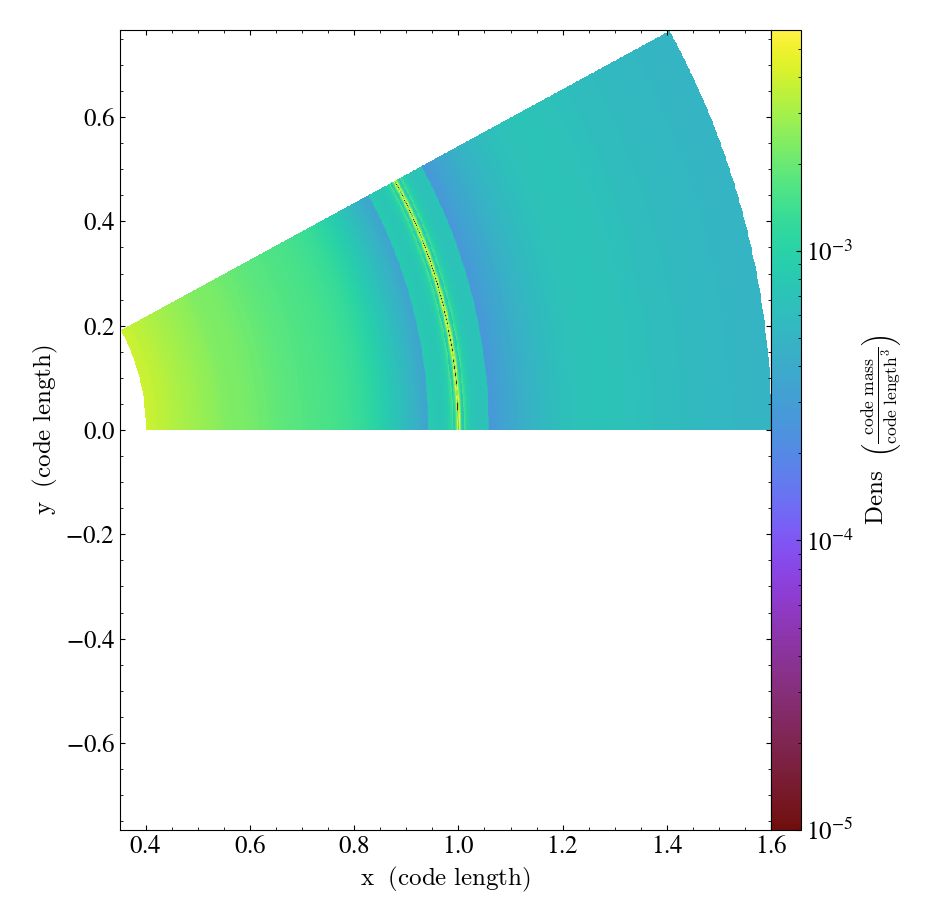

In [6]:
yt.SlicePlot(ds,"z",("athena_pp","dens"))